# Lab 1

## Task 1

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [49]:
def plot_recording(sensor, type, interval):
    path = f"data/{sensor} - {type}.csv"
    df = pd.read_csv(path, sep=",")

    time = np.linspace(0, len(df) * interval, len(df))

    fig, axes = plt.subplots(nrows=len(df.columns) - 1, ncols=1, figsize=(15, 18))
    fig.suptitle(f"{sensor} - {type}", fontsize=16, fontweight='bold')

    for index, column in enumerate(df.columns[1:]):
        title, units = column.split("(")[0].strip(), column.split("(")[1][:-1]

        axes[index].plot(time, df[column], linewidth=1)
        axes[index].set_title(title)
        axes[index].set_ylabel(units)
        axes[index].set_xlabel("Time (s)")

    plt.tight_layout()
    plt.show()


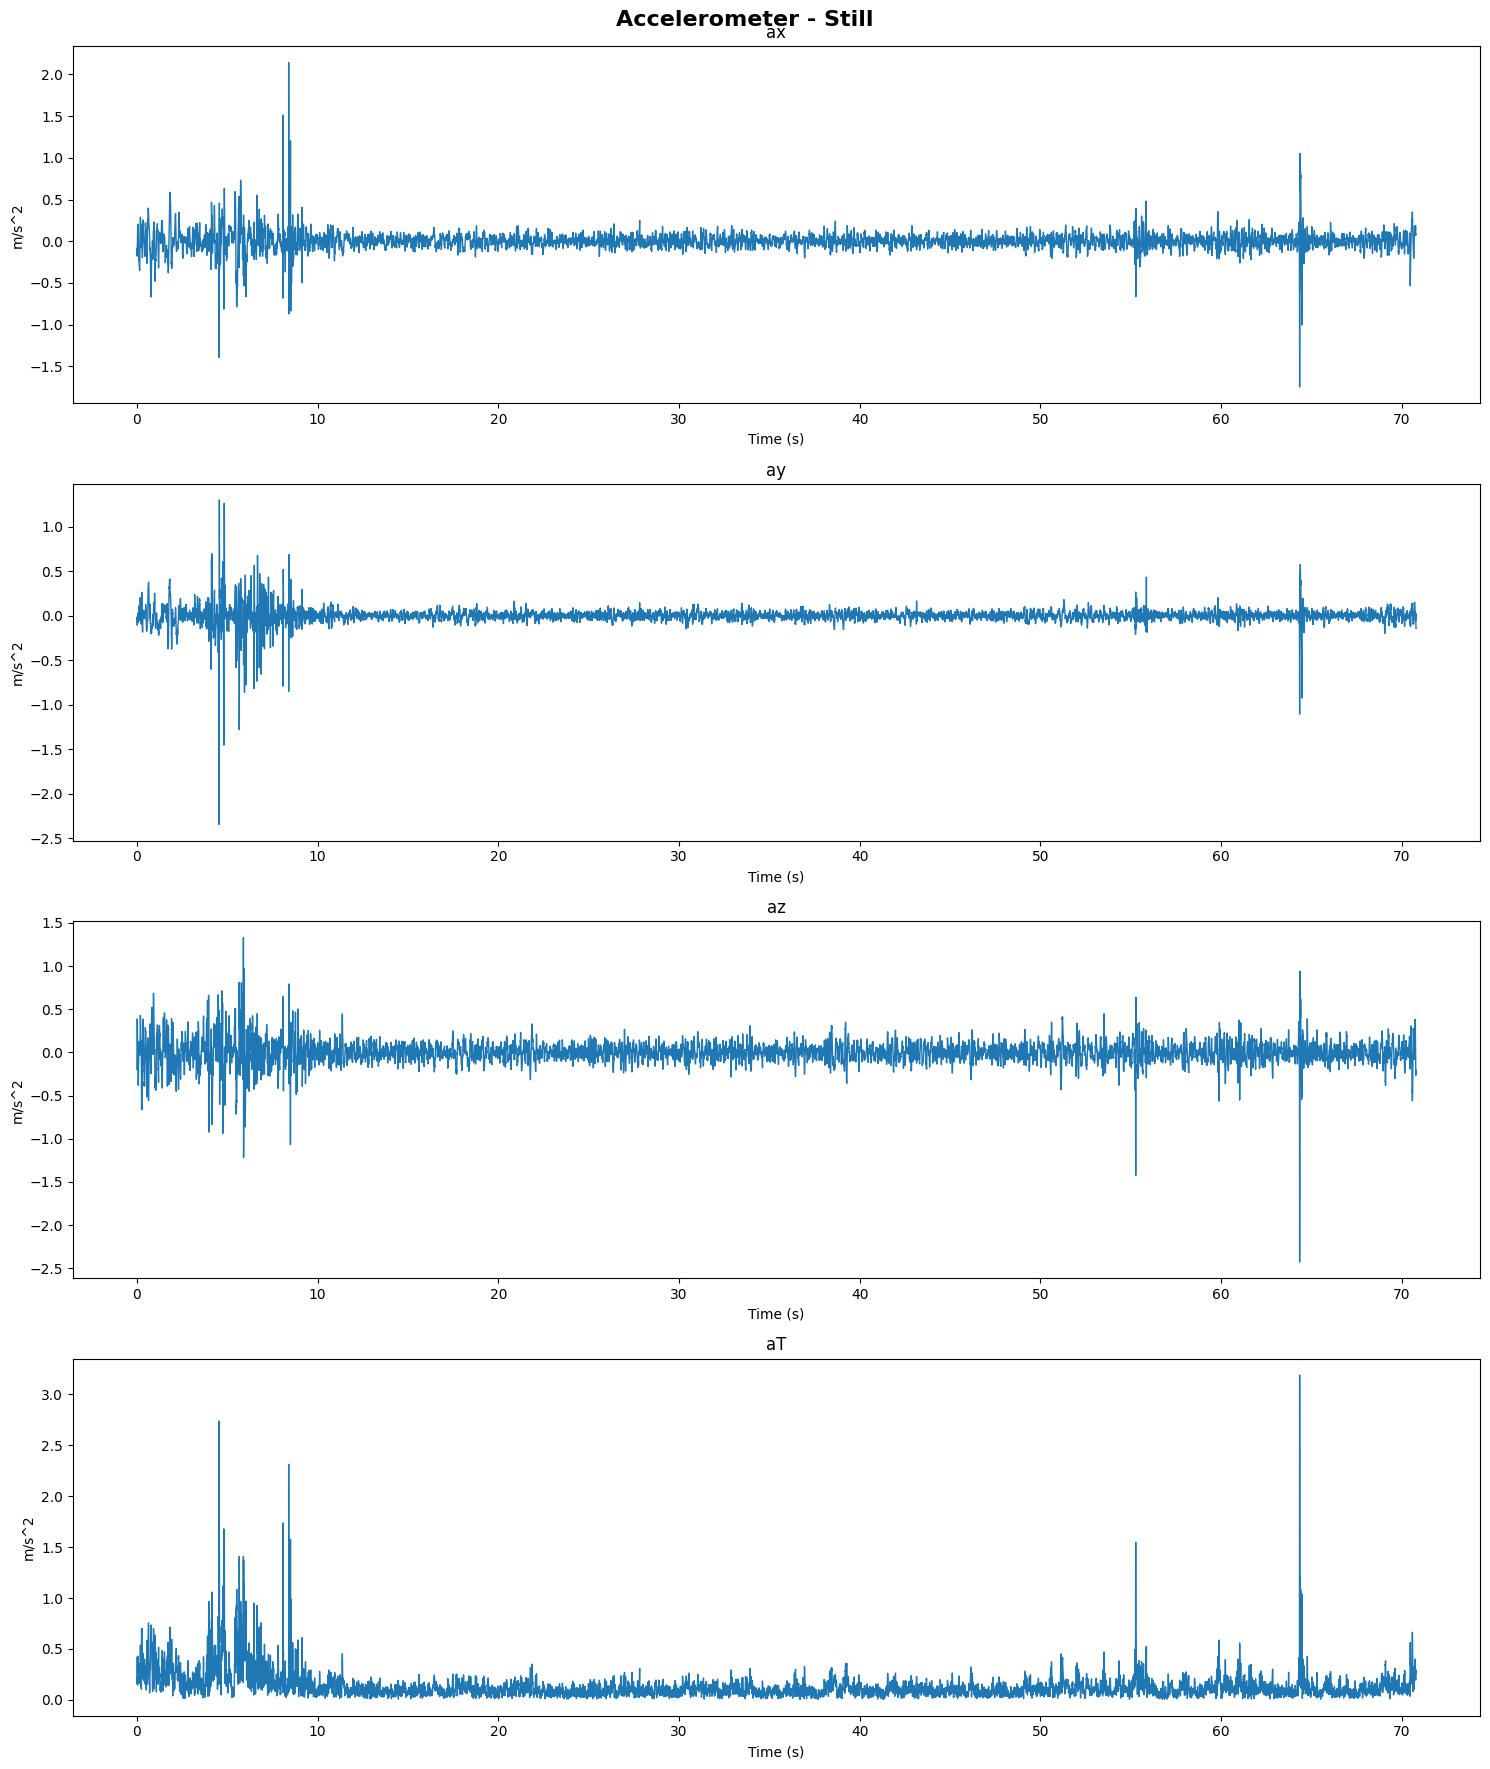

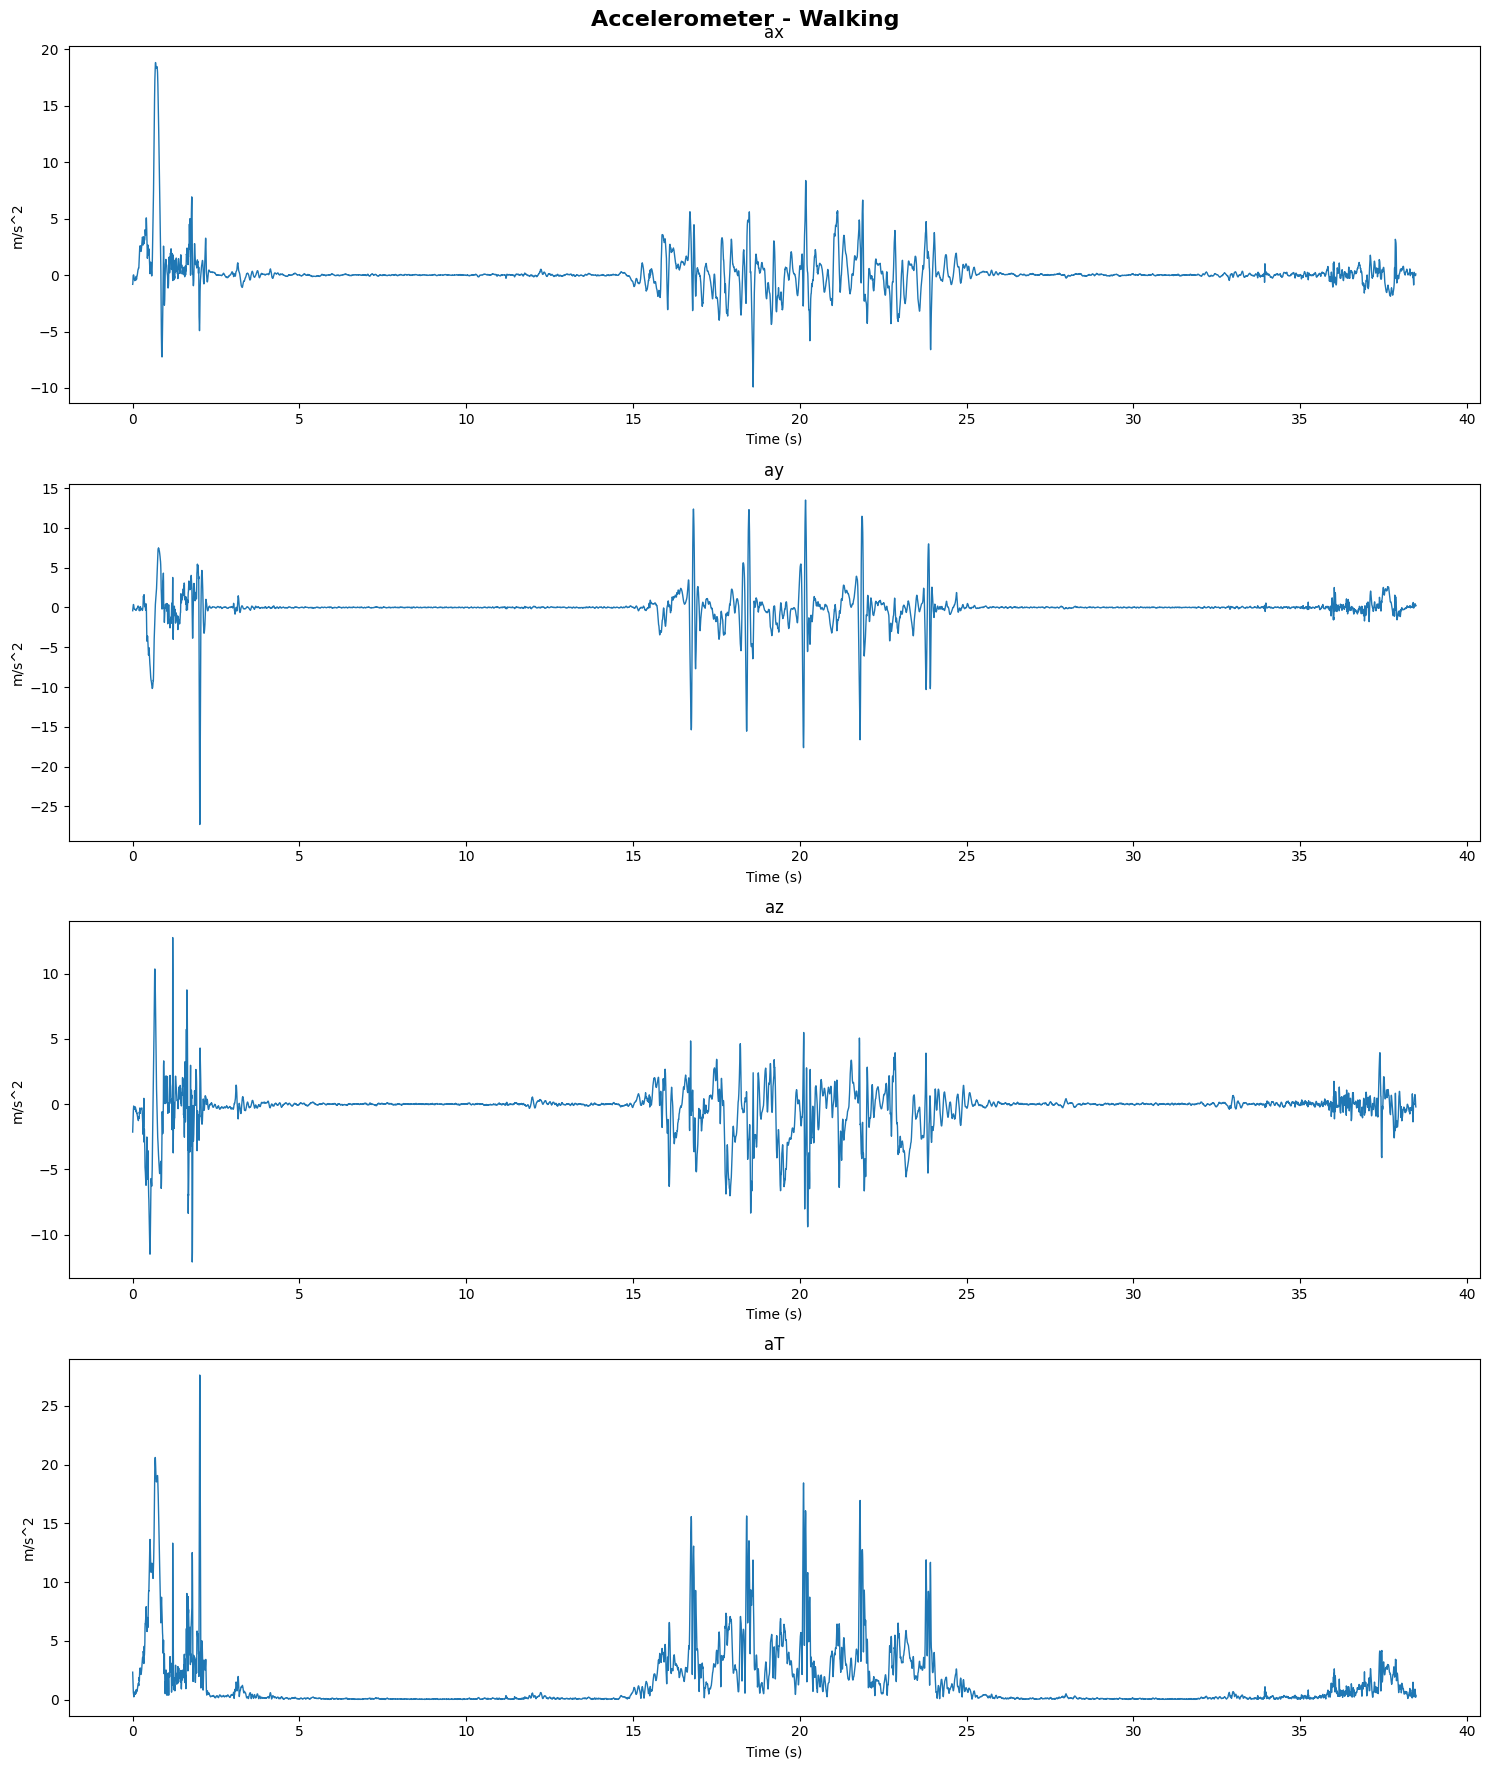

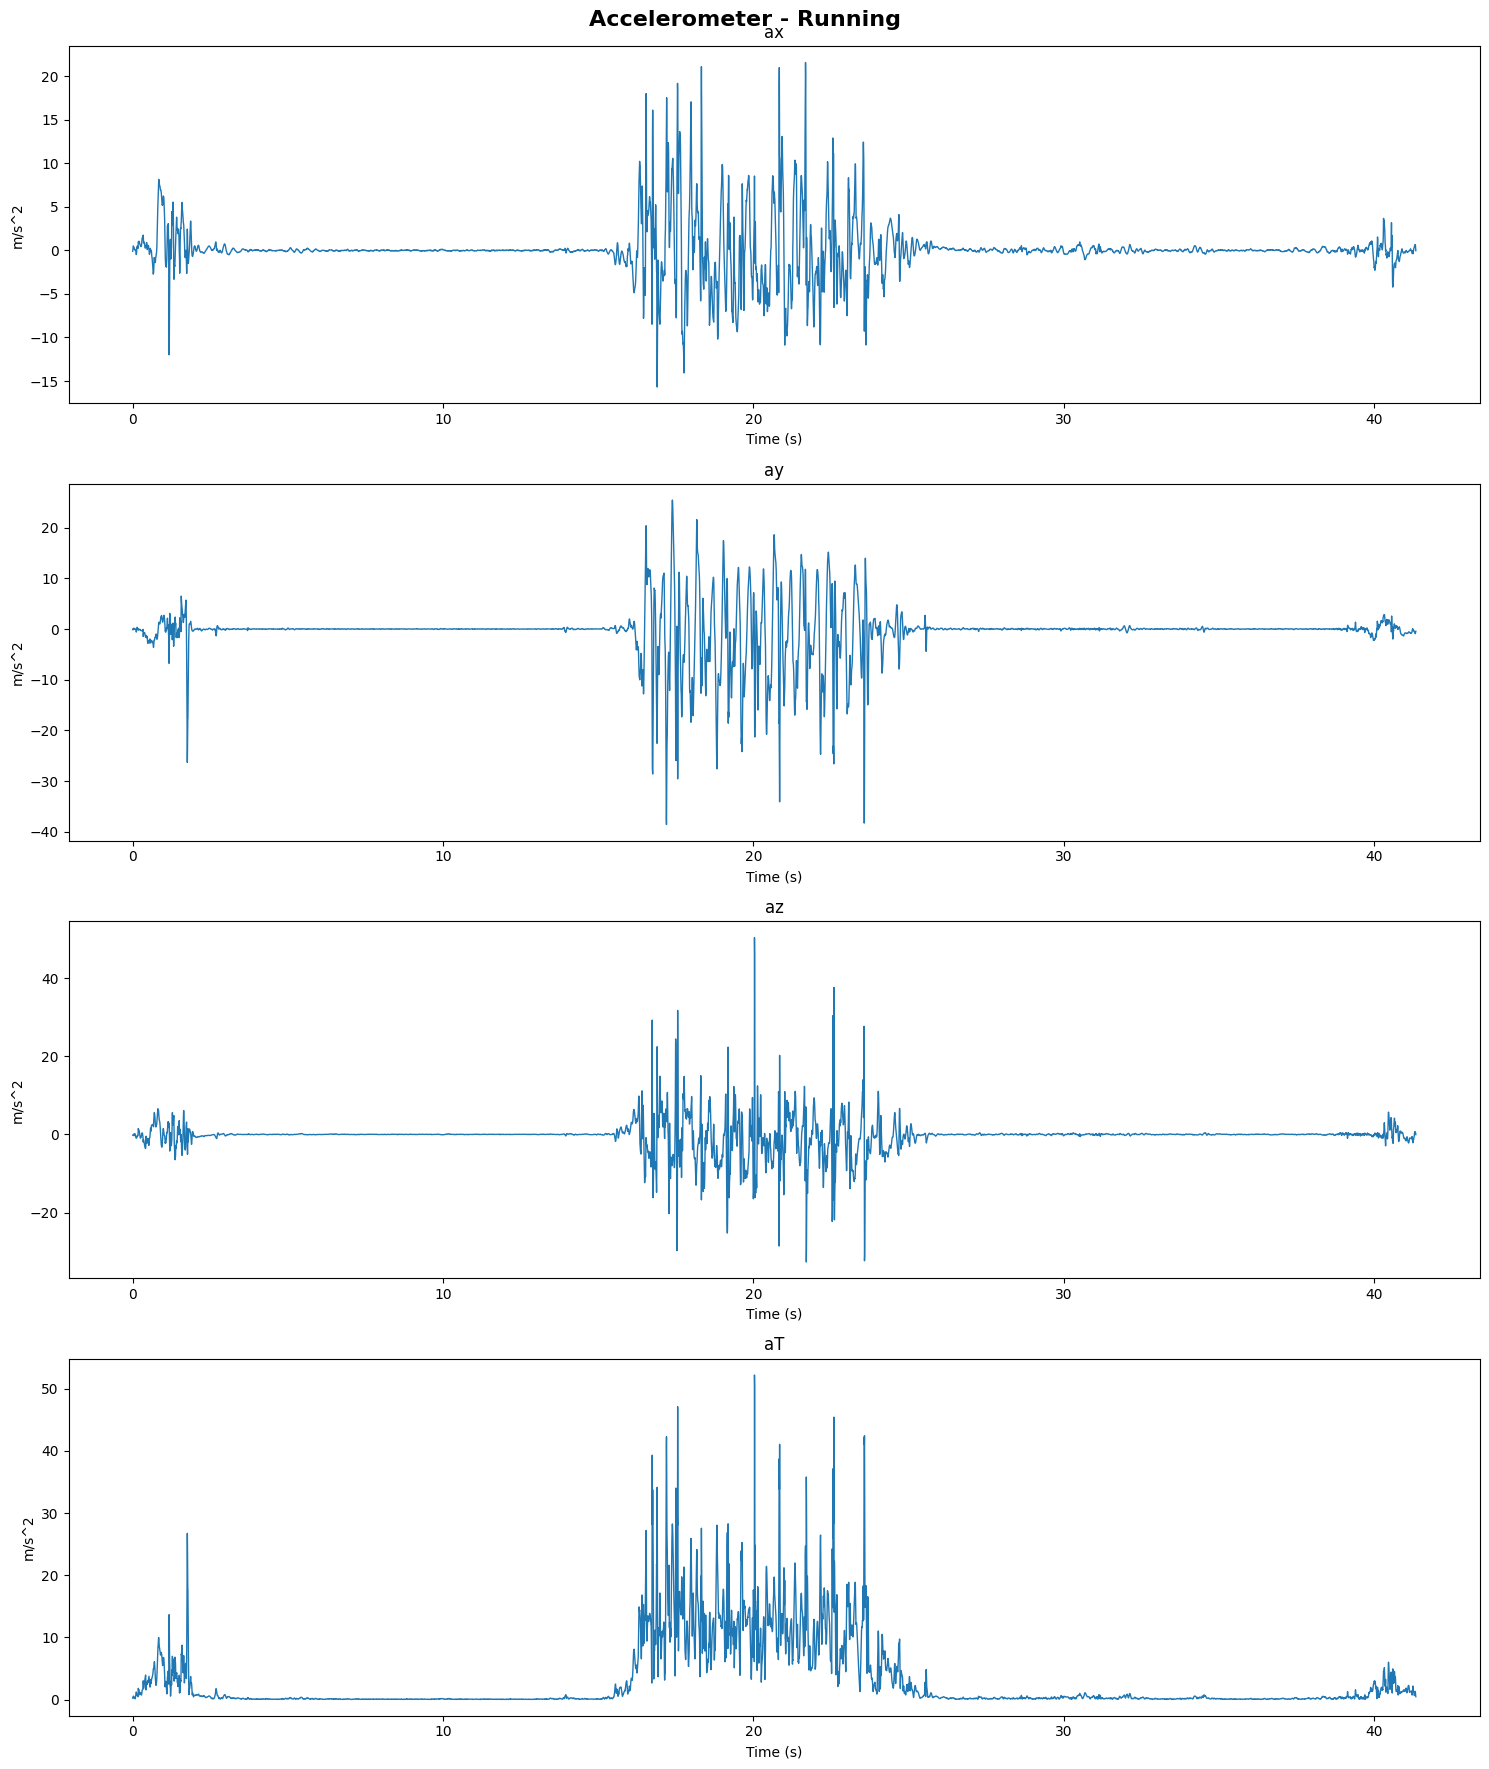

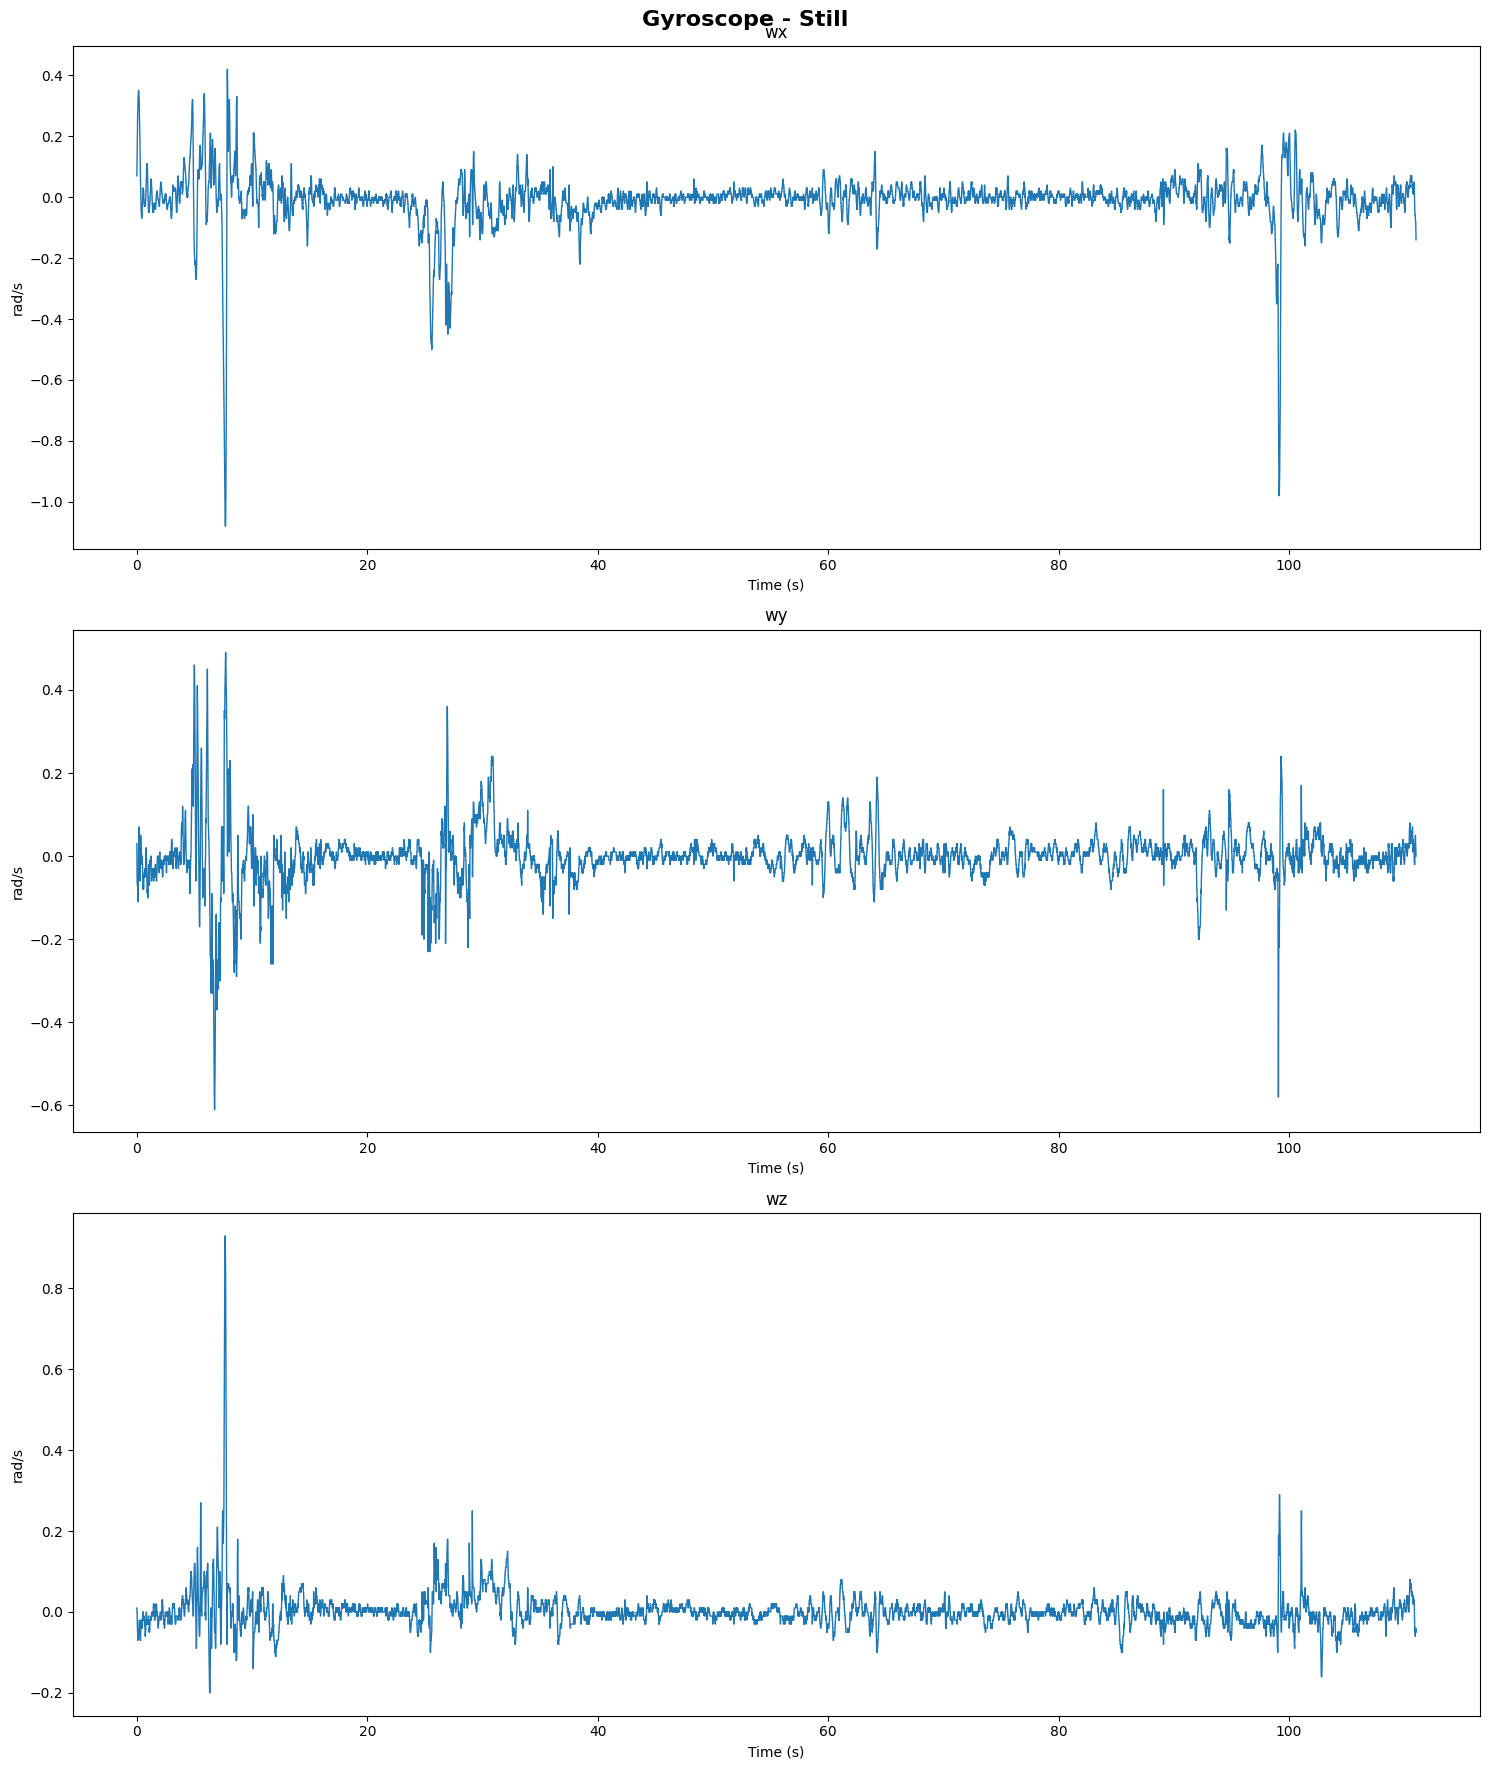

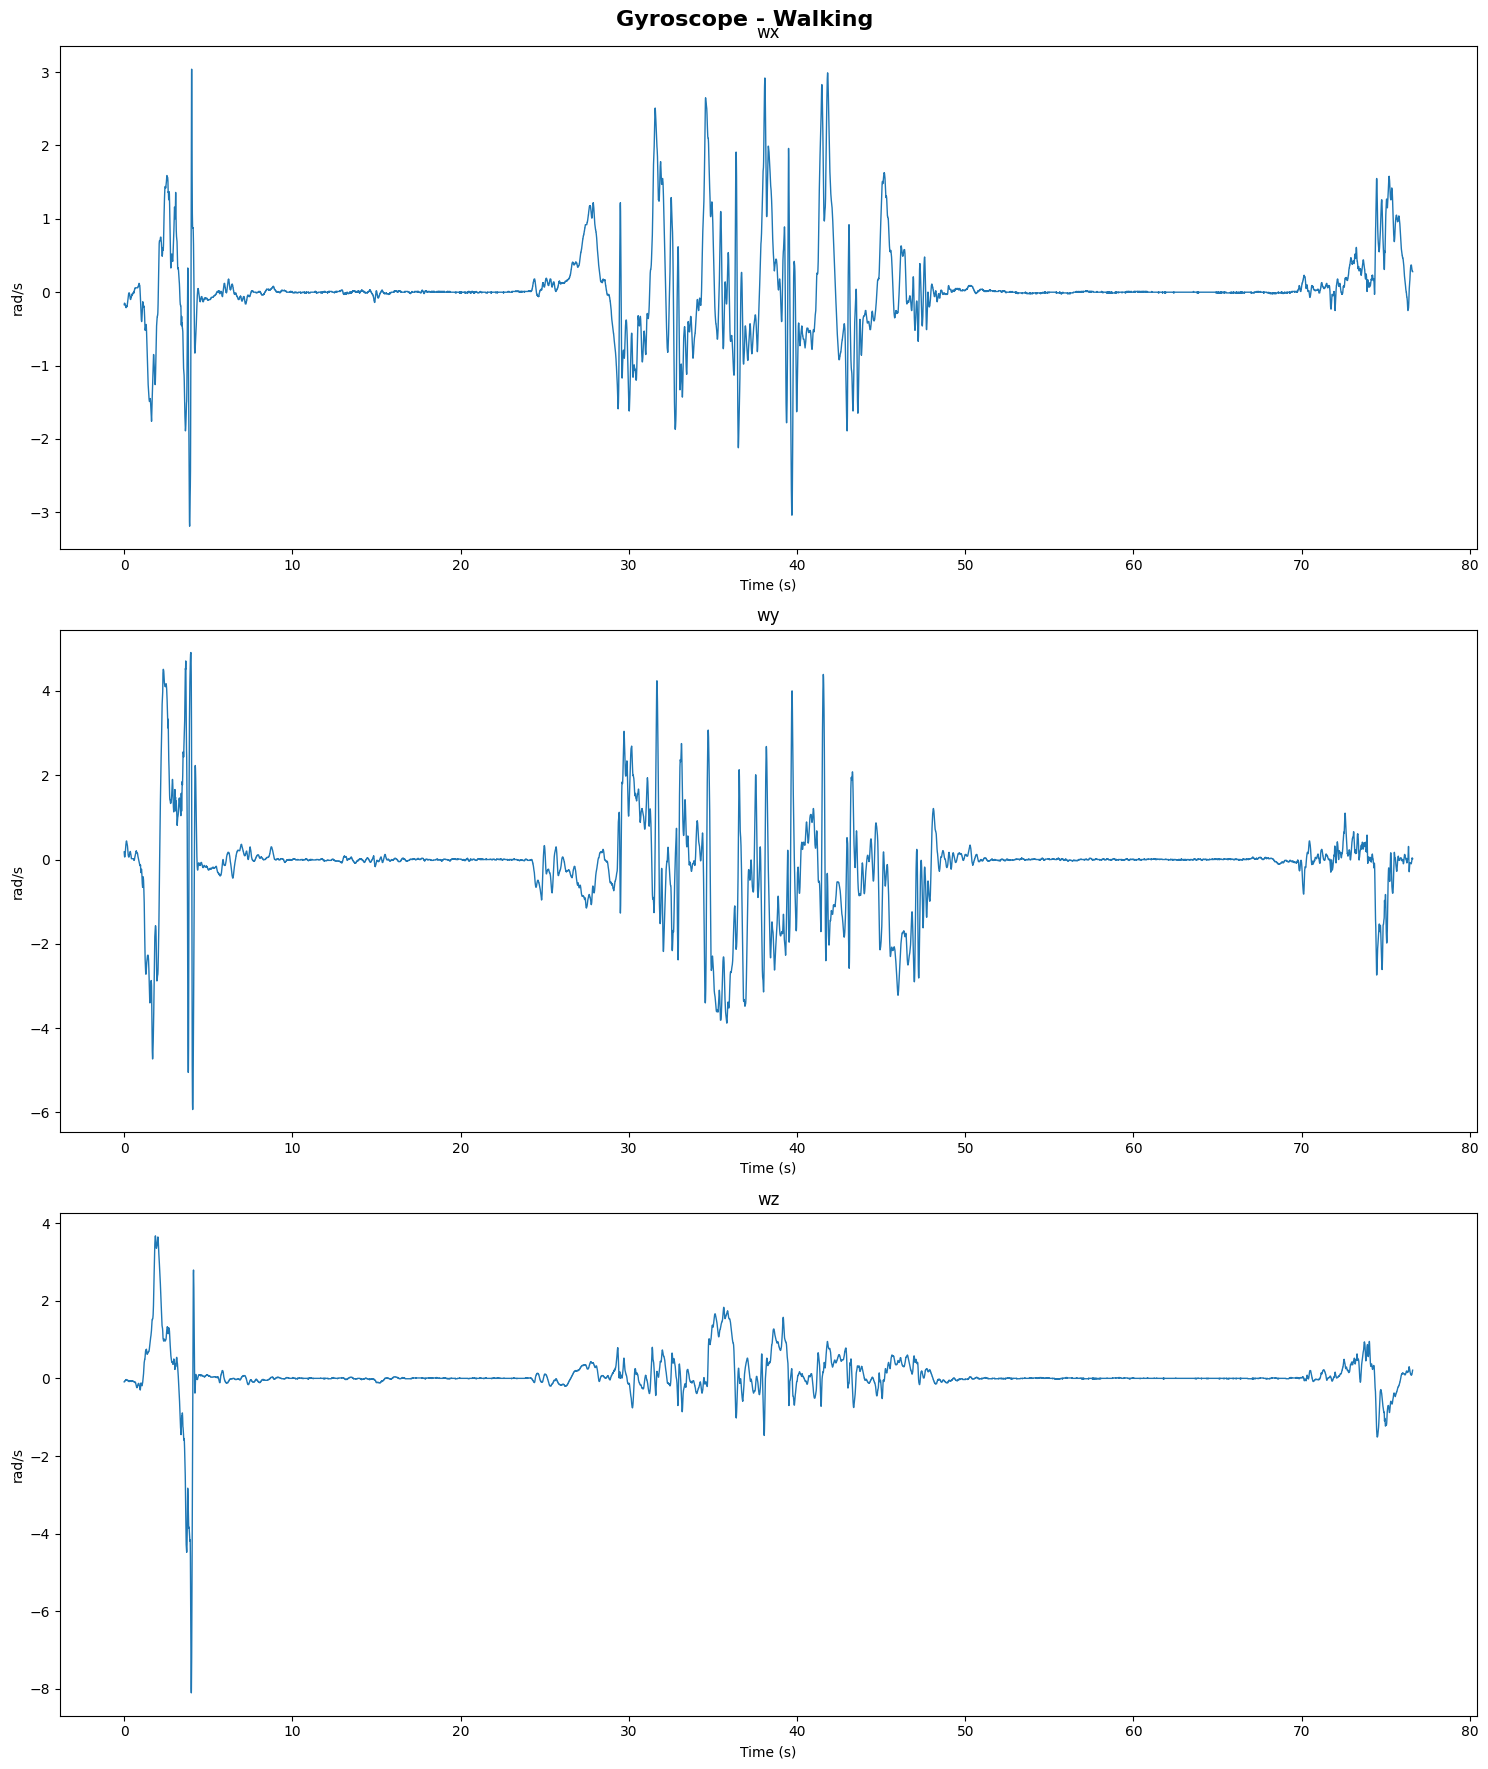

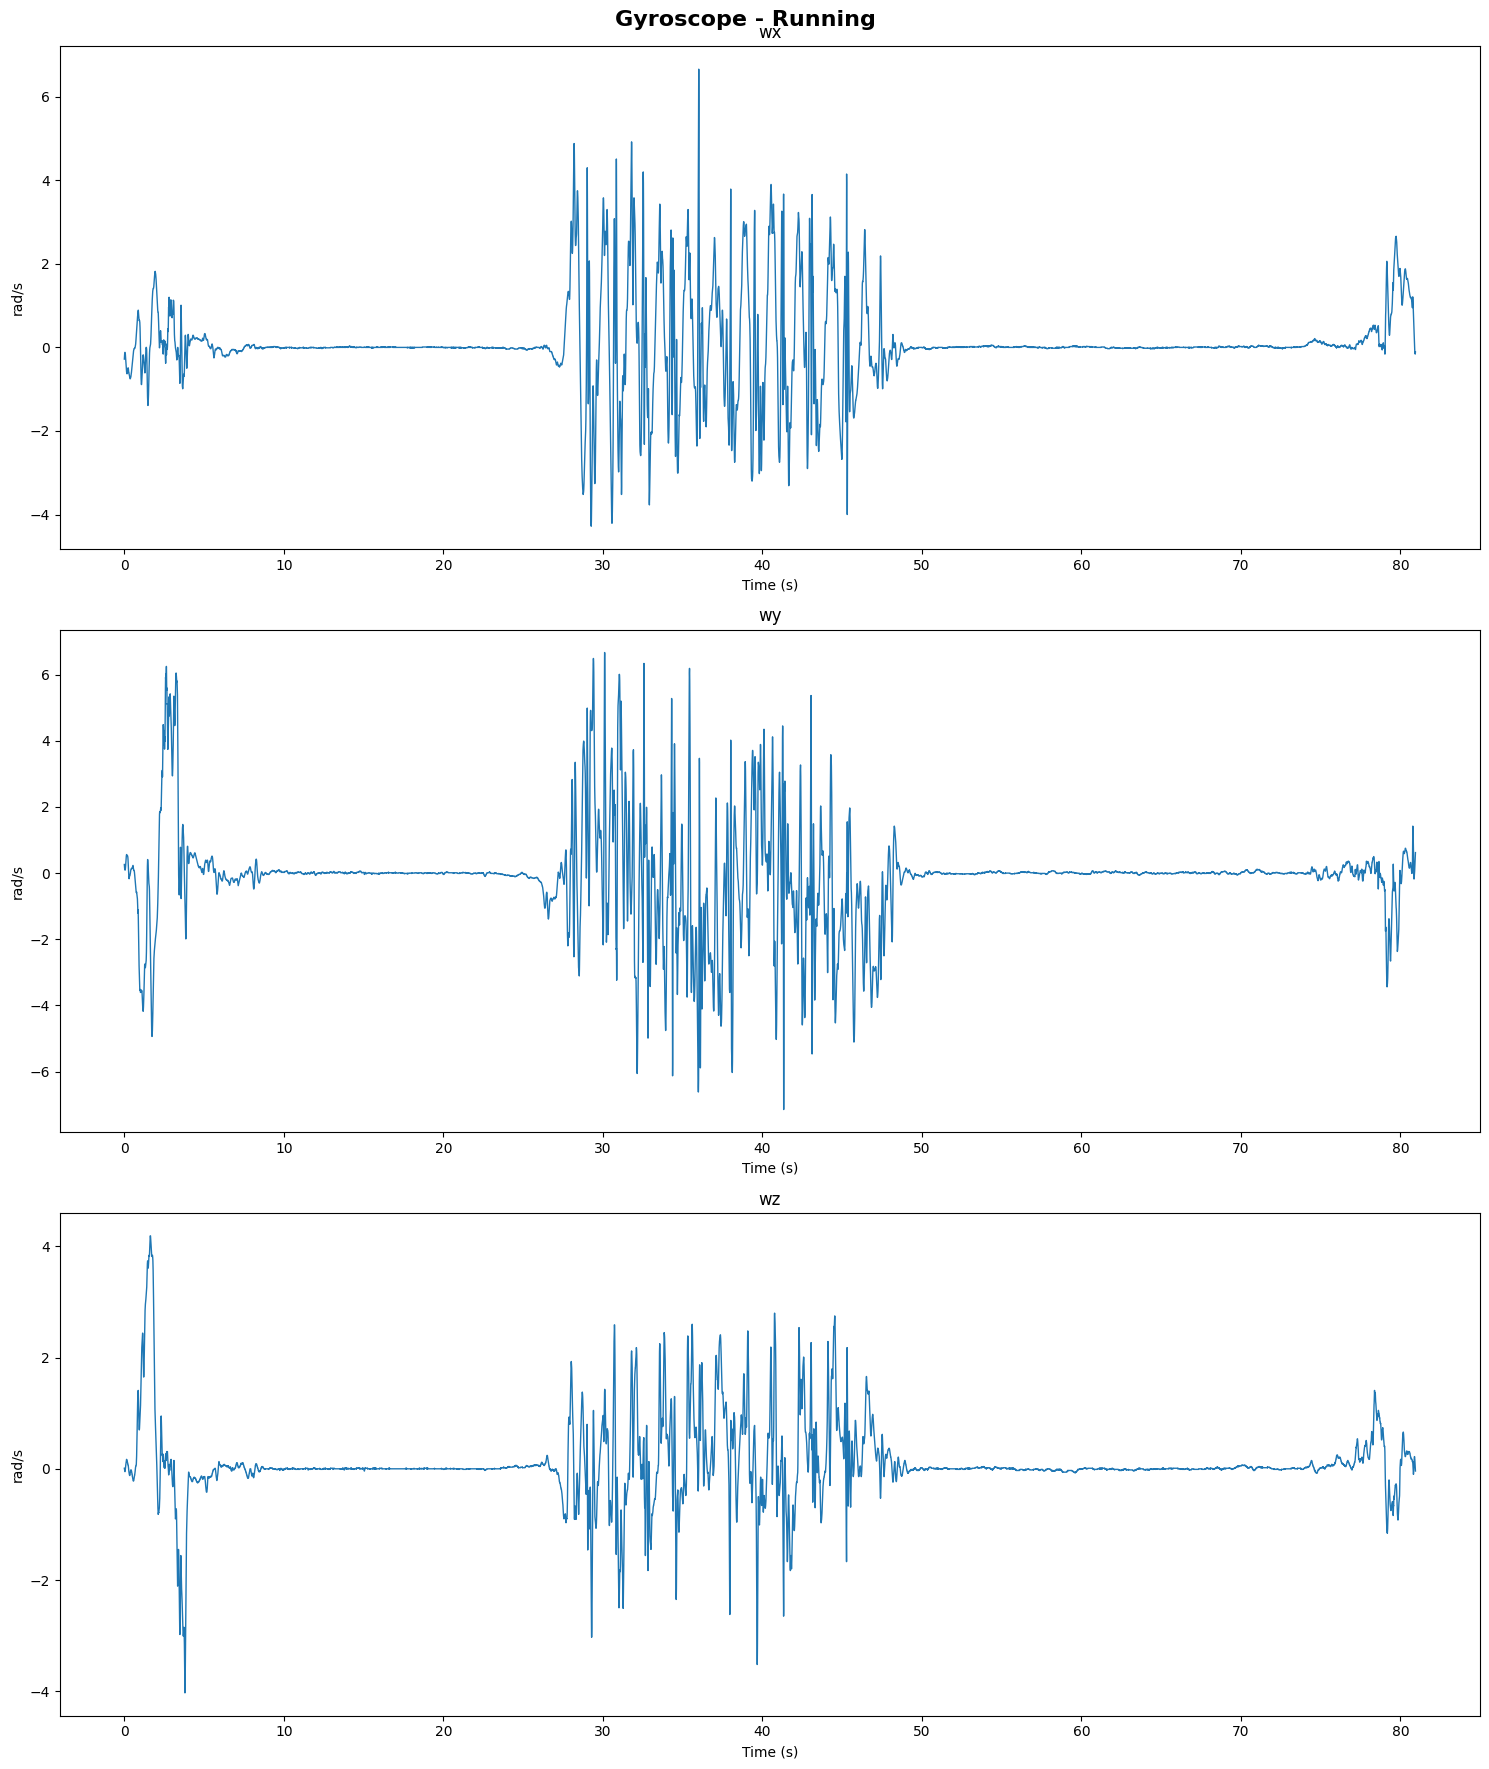

In [50]:
devices = ["Accelerometer", "Gyroscope"]
modes = ["Still", "Walking", "Running"]

for device in devices:
    for mode in modes:
        plot_recording(device, mode, 0.005)


## Task 2

In [51]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
import os

In [52]:
class AudioManager:
    def __init__(self):
        self.pyaudio_instance = pyaudio.PyAudio()

    def open_stream(self, **kwargs):
        return self.pyaudio_instance.open(**kwargs)

    def close(self):
        self.pyaudio_instance.terminate()


def record_audio(duration, sample_rate, channels=1):
    try:
        if not os.path.exists('./data'):
            os.makedirs('./data')

        file_path = f'./data/{duration}_sec_{sample_rate}_hz.npy'
        if os.path.exists(file_path):
            print(f"Warning: File {file_path} already exists. Recording terminated.")
            return load_audio(file_path), file_path

        chunk = 1024
        sample_format = pyaudio.paInt16
        audio_manager = AudioManager()

        stream = audio_manager.open_stream(format=sample_format,
                                           channels=channels,
                                           rate=sample_rate,
                                           frames_per_buffer=chunk,
                                           input=True)

        print("Recording Started...")

        frames = []
        for _ in range(0, int(sample_rate / chunk * duration)):
            data = stream.read(chunk)
            frames.append(data)

        stream.stop_stream()
        stream.close()
        audio_manager.close()

        print("Recording finished!")

        recorded_data = np.frombuffer(b''.join(frames), dtype=np.int16)

        with open(file_path, 'wb') as f:
            np.save(f, recorded_data)

        return recorded_data, file_path

    except Exception as e:
        print(f"An error occurred while recording: {e}")
        return None, None


def play_audio(recording, samplerate):
    try:
        chunk = 1024
        audio_manager = AudioManager()
        stream = audio_manager.open_stream(format=pyaudio.paInt16,
                                           channels=1,
                                           rate=samplerate,
                                           output=True)

        stream.write(recording.tobytes())
        stream.stop_stream()
        stream.close()
        audio_manager.close()

    except Exception as e:
        print(f"An error occurred while playing the audio: {e}")


def plot_audio(recording, samplerate):
    plt.figure(figsize=(15, 5))
    times = np.linspace(0, len(recording) / samplerate, num=len(recording))
    plt.plot(times, recording)
    plt.ylabel("Amplitude")
    plt.xlabel("Time [s]")
    plt.grid(True)  # Add grid for better readability
    plt.title(f"Audio Signal at {samplerate} Hz")
    plt.tight_layout()
    plt.show()


def load_audio(filepath):
    try:
        return np.load(filepath)
    except Exception as e:
        print(f"An error occurred while loading the audio: {e}")
        return None

In [53]:
duration, sample_rate = 5, 8000
_, file_path = record_audio(duration, sample_rate)
loaded_data = load_audio(file_path)
play_audio(loaded_data, sample_rate)

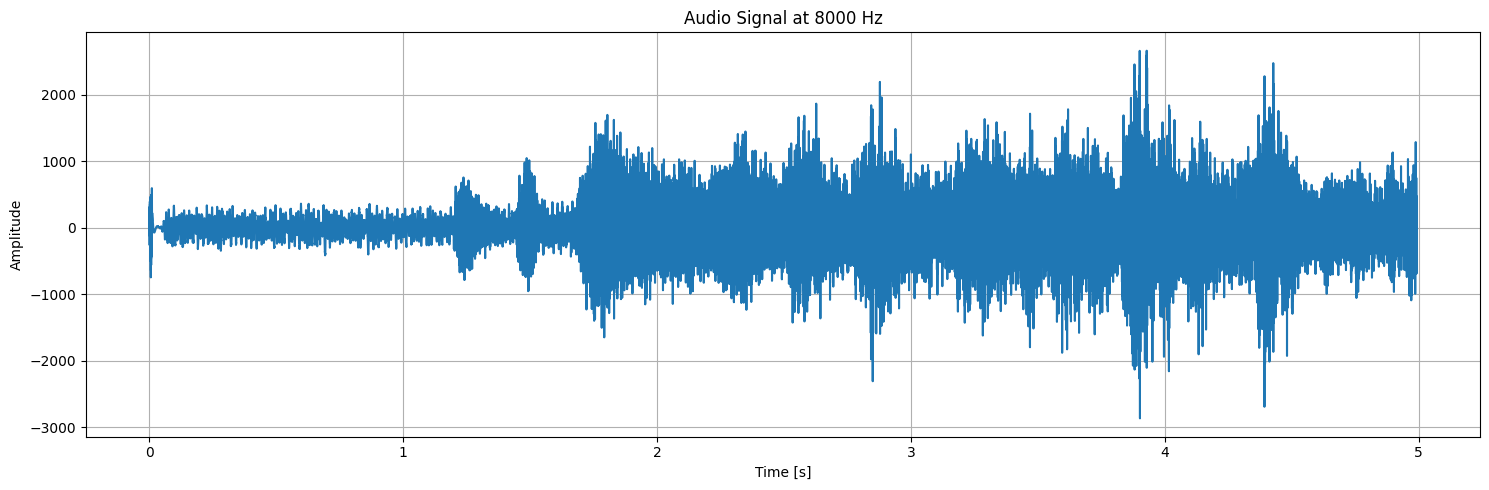

In [54]:
plot_audio(loaded_data, sample_rate)

In [55]:
duration, sample_rate = 5, 44100
_, file_path = record_audio(duration, sample_rate)
loaded_data = load_audio(file_path)
play_audio(loaded_data, sample_rate)

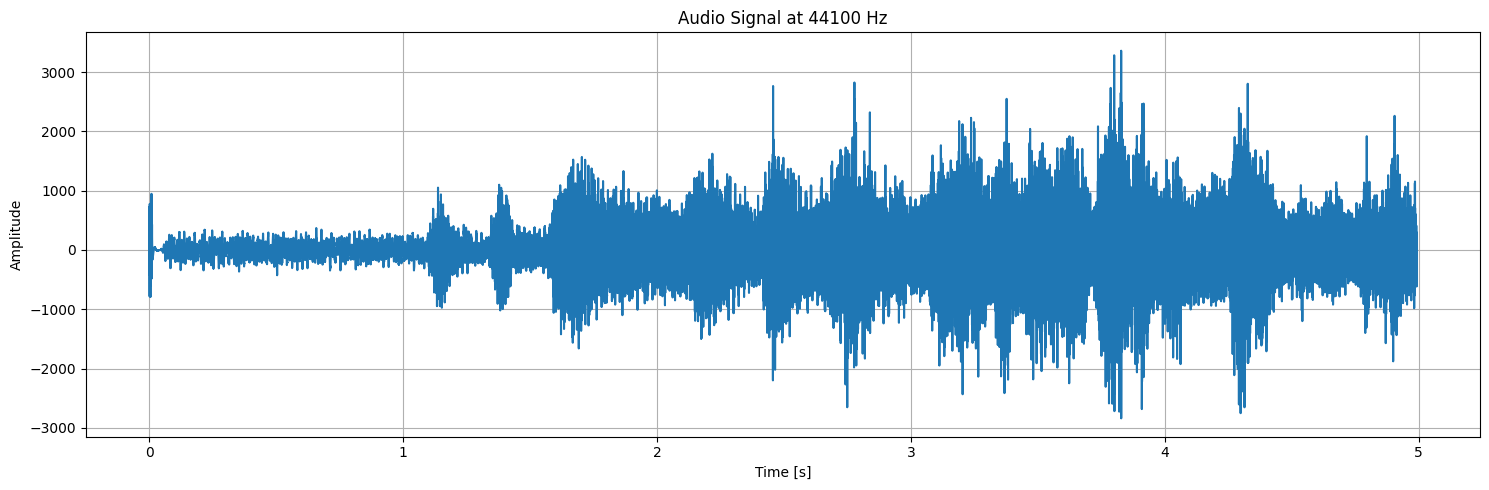

In [56]:
plot_audio(loaded_data, sample_rate)

## Task 3

In [57]:
from scipy.io import loadmat
import os

In [58]:
def read_eeg_from_matlab_file(path):
    return loadmat(path)["sig"][0]

In [59]:
def plot_eeg(path, title):
    eeg = read_eeg_from_matlab_file(path)

    plt.figure(figsize=(15, 5))
    time = np.linspace(0, len(eeg) / 256, num=len(eeg))

    plt.plot(time, eeg, linewidth=1)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (μV)")

    plt.tight_layout()
    plt.show()

In [60]:
healthy_eeg_path, sick_eeg_path = "data/EEG_healthy/eeg_healthy_1.mat", "data/EEG_sick/eeg_sick_1.mat"
healthy_eeg, sick_eeg = read_eeg_from_matlab_file(healthy_eeg_path), read_eeg_from_matlab_file(sick_eeg_path)

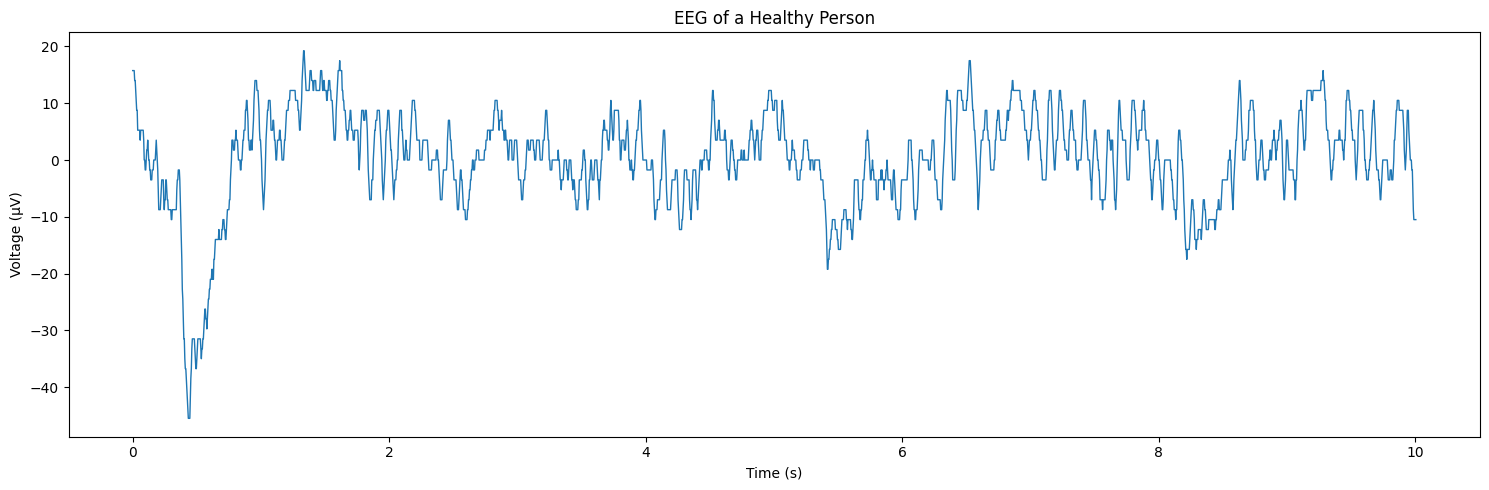

In [61]:
plot_eeg(healthy_eeg_path, "EEG of a Healthy Person")

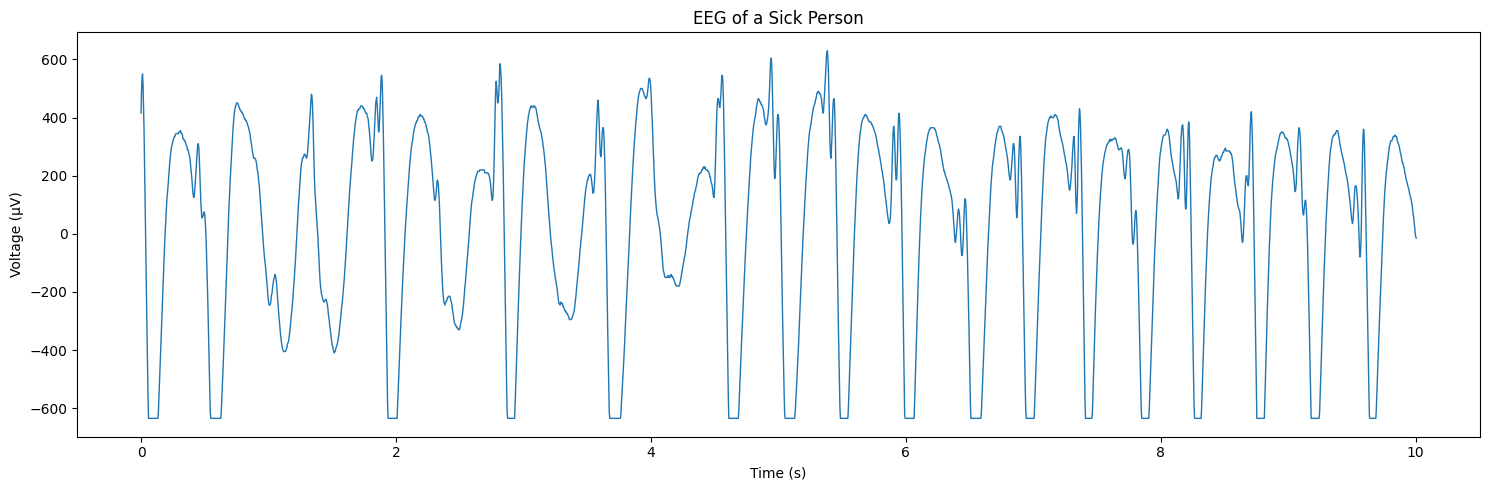

In [62]:
plot_eeg(sick_eeg_path, "EEG of a Sick Person")

## Task 4


In [63]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import os

In [64]:
def read_ecg_from_npz_file(path):
    ecg = np.load(path)
    fs, units = ecg["fs"], str(ecg["units"])
    return fs, units, ecg["labels"], ecg["labels_indexes"], ecg["signal"]

In [65]:
def plot_ecg(path, title):
    fs, units, labels, labels_indexes, signal = read_ecg_from_npz_file(path)

    plt.figure(figsize=(15, 5))
    time = np.linspace(0, len(signal) / fs, num=len(signal))

    plt.plot(time, signal, linewidth=1)
    
    for idx, label in zip(labels_indexes, labels):
        time_point = time[idx]
        plt.annotate(label, (time_point, signal[idx]), color="red")
        plt.plot(time_point, signal[idx], 'ro')
        
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel(units)
    plt.grid(True)
    plt.show()

In [66]:
healthy_ecg_path, sick_ecg_path = "data/ECG_healthy/1600714586.npz", "data/ECG_sick/1600714992.npz"

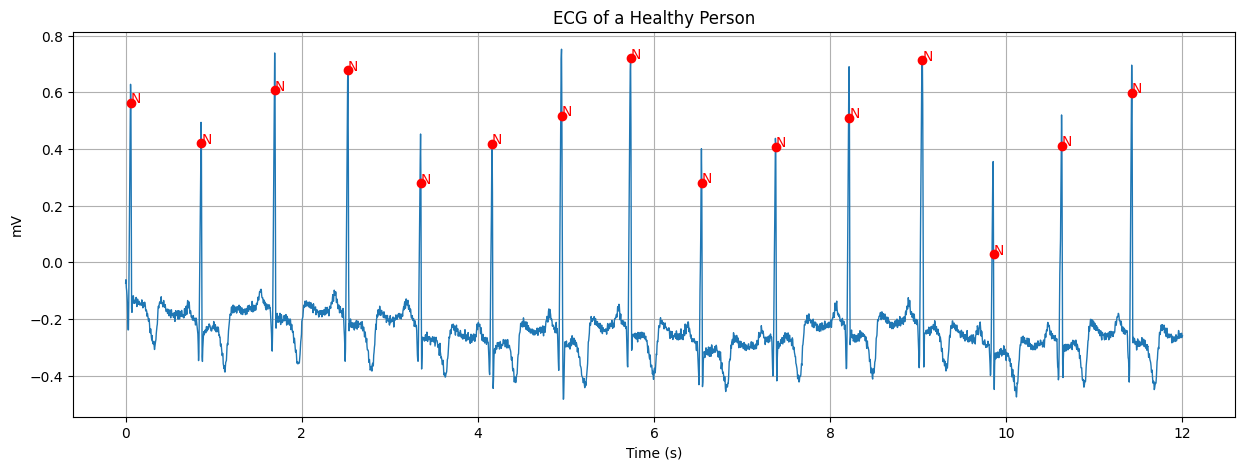

In [67]:
plot_ecg(healthy_ecg_path, "ECG of a Healthy Person")

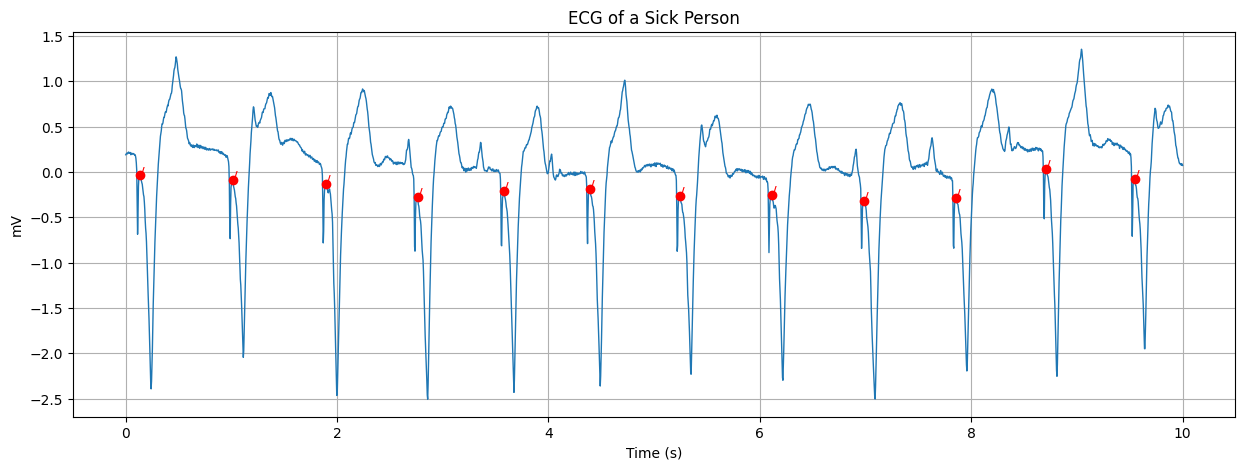

In [68]:
plot_ecg(sick_ecg_path, "ECG of a Sick Person")

## Task 5


In [69]:
from scipy.interpolate import interp1d
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [70]:
def read_hrv_from_matlab_file(path):
    try:
        return np.ravel(loadmat(path)["hr_ap"])
    except KeyError:
        return np.ravel(loadmat(path)["hr_norm"])

def plot_hrv(timestamps, signal, title):
    plt.figure(figsize=(15, 5))
    plt.plot(timestamps, signal, linewidth=1)
    plt.title(title)
    plt.xlabel('Time (ms)')
    plt.ylabel('Interval Duration (ms)')
    plt.show()

def plot_hrv_and_interpolated_hrv(path, title):
    heart_sig = read_hrv_from_matlab_file(path)

    timestamps = np.ravel(np.cumsum(heart_sig))
    print(f"Signal duration: {timestamps[-1] - timestamps[0]} ms")

    plot_hrv(timestamps, heart_sig, f"HRV signal of a {title} person")

    linear_interpolation = interp1d(timestamps, heart_sig, kind='linear', fill_value="None")
    timestamps_one_hz = np.arange(timestamps[0], timestamps[-1], 1000)

    new_hrv = linear_interpolation(timestamps_one_hz)

    plot_hrv(timestamps_one_hz, new_hrv, f"Interpolated HRV signal of a {title} person")

    with open(f'./data/hrv_interp_{title}.npy', 'bw') as linear_interpolation:
        np.save(linear_interpolation, new_hrv)




Signal duration: 23354510 ms


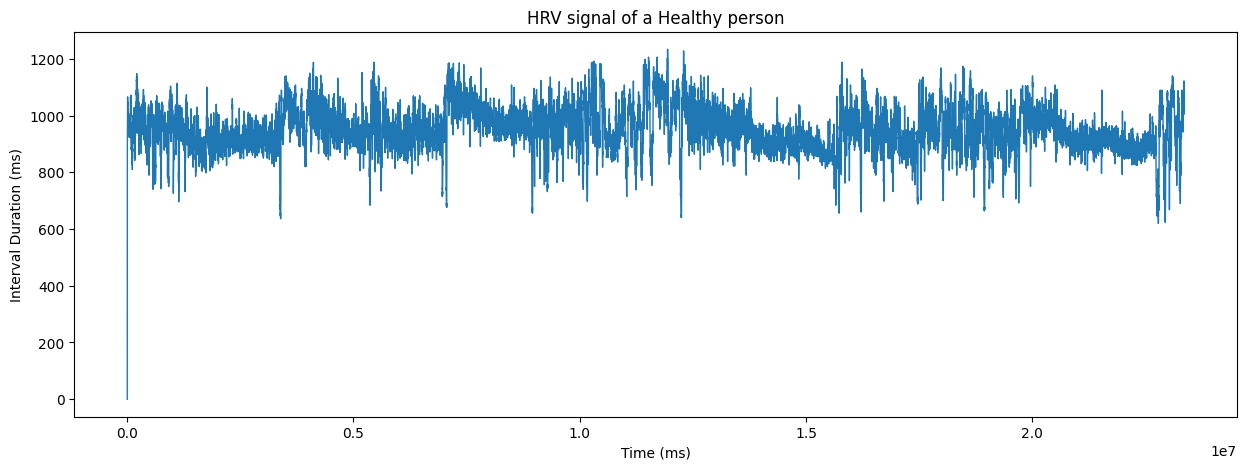

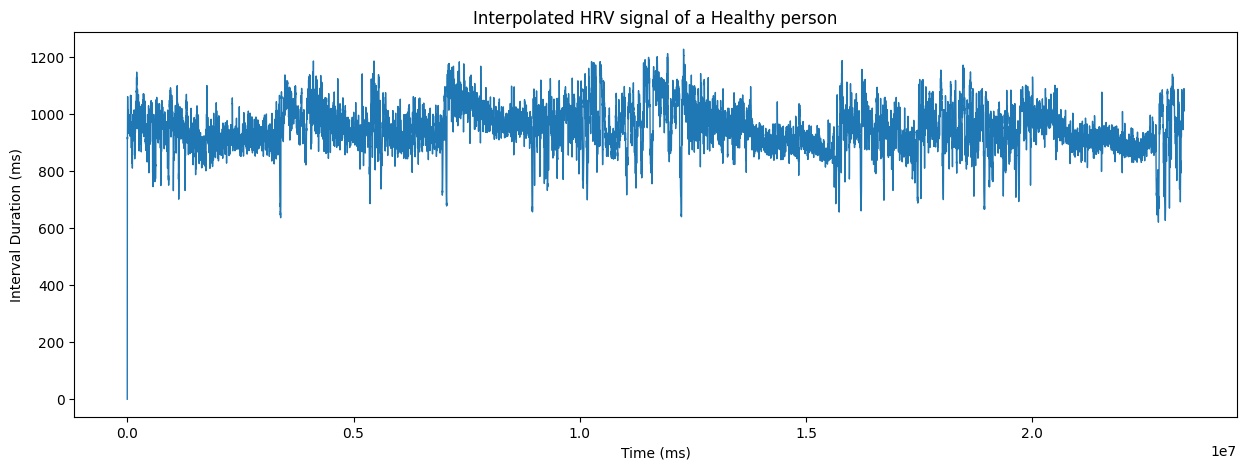

In [71]:
plot_hrv_and_interpolated_hrv("data/heart_rate_norm.mat", "Healthy")

Signal duration: 31424504 ms


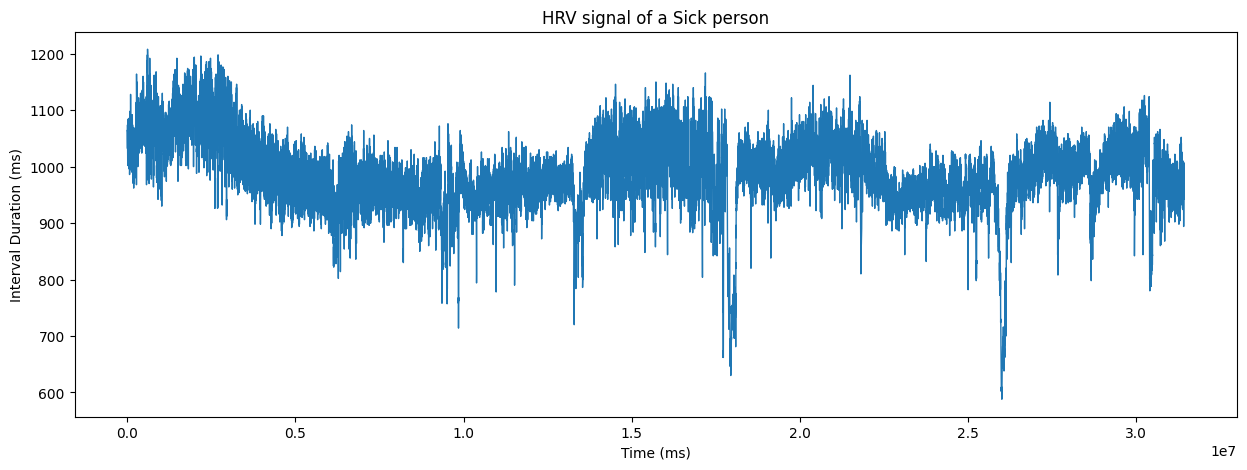

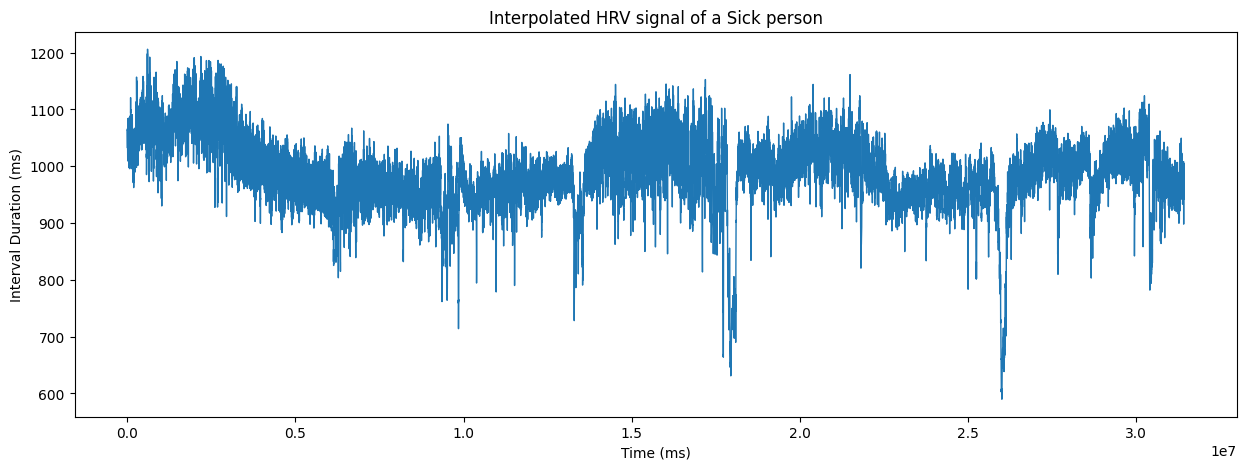

In [72]:
plot_hrv_and_interpolated_hrv("data/heart_rate_apnea.mat", "Sick")


## Task 6

In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
# Adding titles only if not already present
def add_titles_to_csv(filename, titles):
    with open(filename, 'r+') as f:
        first_line = f.readline().strip()
        if first_line != titles.strip():
            content = f.read()
            f.seek(0, 0)
            f.write(titles.rstrip('\r\n') + '\n' + content)

In [64]:
# preparing the files by adding titles
for path in ["./data/cop_data/handball", "./data/cop_data/acrobats"]:
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                add_titles_to_csv(file_path, "time_ms top_left_f_kg top_right_f_kg bottom_left_f_kg bottom_right_f_kg cop_x cop_y total_fs")

In [65]:
df = pd.read_csv("data/cop_data/acrobats/base_close/2.csv", sep=" ")
df

,time_ms,top_left_f_kg,top_right_f_kg,bottom_left_f_kg,bottom_right_f_kg,cop_x,cop_y,total_fs
0,2738384,4.69565,5.50165,7.85662,7.26032,0.207099,2.91514,25.3142
1,2738404,4.73043,5.51099,7.90892,7.25096,0.120655,2.90445,25.4013
2,2738414,4.73043,5.51099,7.90892,7.25096,0.120655,2.90445,25.4013
3,2738424,4.74783,5.47363,7.86708,7.24161,0.099021,2.89412,25.3301
4,2738435,4.77391,5.52967,7.87754,7.30710,0.181767,2.87254,25.4882
...,...,...,...,...,...,...,...,...
2781,2768309,3.93043,4.29670,9.24800,7.96203,-0.903901,5.29710,25.4372
2782,2768319,3.93043,4.29670,9.24800,7.96203,-0.903901,5.29710,25.4372
2783,2768329,3.88696,4.34341,9.38400,8.05559,-0.849207,5.38133,25.6699
2784,2768352,3.80000,4.26868,9.30031,8.10237,-0.715764,5.49676,25.4714


In [78]:
def plot_cop(df, athlete_type, activity_type):
    timestamps = df["time_ms"].to_numpy()
    timestamps = timestamps - timestamps[0]
    
    plt.figure(figsize=(15, 5))
    plt.plot(timestamps, df["cop_x"], label="CoP X", linewidth=1)
    plt.plot(timestamps, df["cop_y"], label="CoP Y", linewidth=1)
    
    plt.title(f"CoP Stabilogram: {athlete_type} ({activity_type})")
    plt.xlabel("Time (ms)")
    plt.ylabel("CoP (mm)")
    plt.grid(True)
    plt.legend()
    plt.show()

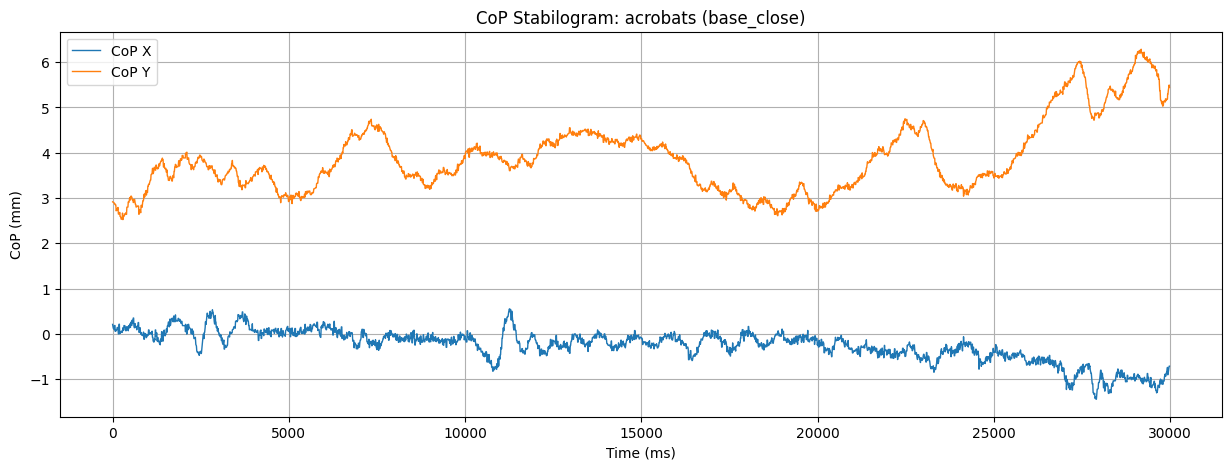

In [79]:
plot_cop(df, "acrobats", "base_close")

In [84]:
def plot_cop_3d(df, athlete_type, activity_type):
    timestamps = df["time_ms"].to_numpy()
    timestamps = timestamps - timestamps[0]

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot(df["cop_x"], df["cop_y"], timestamps, linewidth=1)
    
    ax.set_xlabel("CoP X (mm)")
    ax.set_ylabel("CoP Y (mm)")
    ax.set_zlabel("Time (ms)")
    ax.set_title(f"3D CoP Stabilogram: {athlete_type} ({activity_type})")
    
    plt.show()

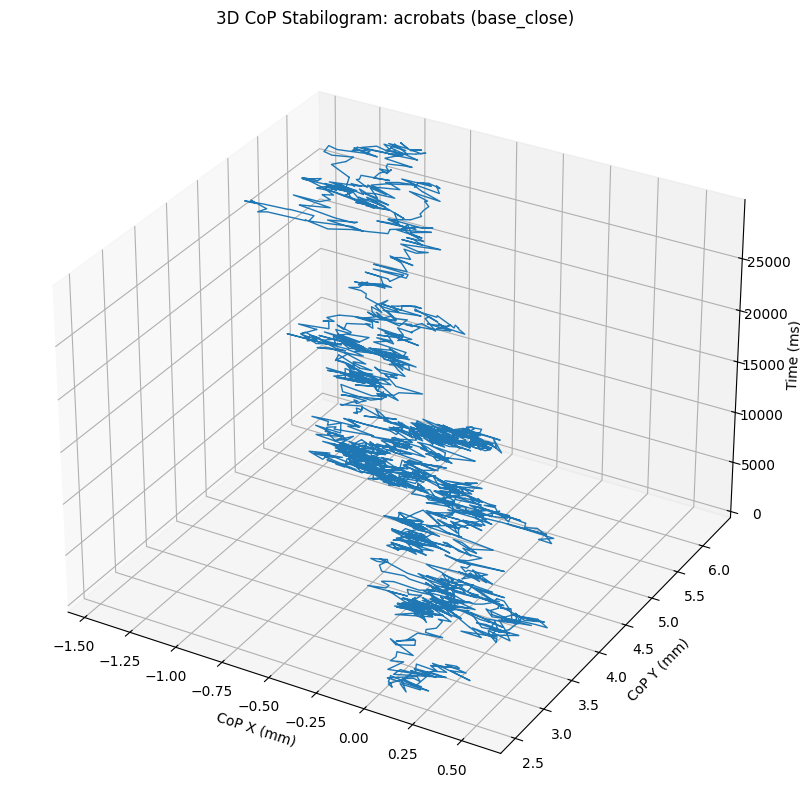

In [85]:
plot_cop_3d(df, "acrobats", "base_close")

In [86]:
import re

# Function to clear CSV from tabs and replace them with spaces
def clear_tabs_in_file(filename):
    with open(filename, 'r+') as f:
        lines = f.readlines()
        f.seek(0)
        for line in lines:
            f.write(re.sub(r'\t', ' ', line))
        f.truncate()

# Fixing this specific file - it is broken
file_path = "data/cop_data/acrobats/base_open/3.csv"
clear_tabs_in_file(file_path)

In [87]:
def get_statistics(athlete_type, activity_type):
    folder_path = f"data/cop_data/{athlete_type}/{activity_type}"
    
    # Initialize stats dictionary
    stats = {
        "CoP X mean": [],
        "CoP X median": [],
        "CoP X standard deviation": [],
        "CoP Y mean": [],
        "CoP Y median": [],
        "CoP Y standard deviation": []
    }
    
    # List files and filter out "stats" files
    files = [file for file in os.listdir(folder_path) if "stats" not in file]
    
    # Loop through each file
    for file in files:
        df = pd.read_csv(f"{folder_path}/{file}", sep=" ")
        
        # Dynamically compute stats for cop_x and cop_y
        for axis in ['cop_x', 'cop_y']:
            stats[f"CoP {axis[-1].upper()} mean"].append(df[axis].mean())
            stats[f"CoP {axis[-1].upper()} median"].append(df[axis].median())
            stats[f"CoP {axis[-1].upper()} standard deviation"].append(df[axis].std())
    
    # Save the results into a DataFrame and write to CSV
    stats_df = pd.DataFrame(stats)
    stats_df.to_csv(f"{folder_path}/stats.csv", index=False)
    
    return stats_df


In [88]:
df_acrobats_base = get_statistics("acrobats", "base_open")
df_acrobats_base

,CoP X mean,CoP X median,CoP X standard deviation,CoP Y mean,CoP Y median,CoP Y standard deviation
0,-0.026119,-0.034508,0.226950,5.058431,4.979460,0.497568
1,-2.860076,-2.833070,0.185216,4.700523,4.701840,0.452556
2,-0.727758,-0.725618,0.119512,1.184997,1.245530,0.383533
3,-1.703578,-1.696020,0.134047,3.466929,3.432980,0.302442
4,1.061120,1.069760,0.162873,3.421602,3.241020,0.713562
5,-1.655857,-1.659800,0.143568,5.705658,5.748490,0.355054
6,-0.006797,-0.072981,0.447208,3.504734,3.406050,0.970960
7,0.776620,0.839570,0.407904,-0.075186,-0.123921,0.936743
8,2.067804,2.065170,0.096347,3.600790,3.565490,0.321148
9,1.624191,1.569740,0.363083,5.507435,5.723695,0.741741


In [89]:
df_handball_base = get_statistics("handball", "base_open")
df_handball_base

,CoP X mean,CoP X median,CoP X standard deviation,CoP Y mean,CoP Y median,CoP Y standard deviation
0,0.737057,0.796831,0.198107,3.239459,3.274570,0.299787
1,0.859723,0.865474,0.087874,4.540366,4.551175,0.244129
2,0.152709,0.157124,0.160767,4.720278,4.631060,0.846232
3,-0.334497,-0.337358,0.077522,4.339164,4.308865,0.238222
4,-0.198711,-0.210401,0.248426,1.661047,1.681535,0.565834
5,-0.805726,-0.778477,0.324619,5.077645,5.043455,0.465407
6,1.577021,1.622270,0.263621,3.450017,3.507340,0.497114
7,1.593346,1.573590,0.192633,1.648226,1.667760,0.218776
8,-0.777777,-0.776963,0.110538,2.703335,2.707745,0.343781
9,0.737105,0.738828,0.107231,6.588132,6.703530,0.653766


In [91]:
df_acrobats_sway = get_statistics("acrobats", "sway_left-right_60")
df_acrobats_sway

,CoP X mean,CoP X median,CoP X standard deviation,CoP Y mean,CoP Y median,CoP Y standard deviation
0,1.135336,3.777260,11.935823,1.869446,1.866500,1.992453
1,0.060739,-0.912745,11.021589,6.955168,7.013580,1.019156
2,-1.763387,-2.686990,11.916080,-0.100147,-0.089216,1.905075
3,2.197388,3.967570,9.373719,2.872952,2.930195,1.918753
4,0.323846,1.430170,10.973811,5.165163,5.109360,1.682965


In [92]:
df_handball_sway = get_statistics("handball", "sway_left-right_60")
df_handball_sway

,CoP X mean,CoP X median,CoP X standard deviation,CoP Y mean,CoP Y median,CoP Y standard deviation
0,0.378498,1.406895,10.573552,2.878637,2.980005,1.525313
1,1.871608,2.257890,8.282311,4.943962,5.071380,0.918211
2,-0.954035,-1.166350,9.270270,3.327447,3.144120,1.506788
3,0.272561,0.159350,7.018989,5.479575,5.563610,1.000768
4,-1.002325,-1.529020,10.191386,4.562879,4.651600,1.070376
5,-0.917114,-1.211265,9.249889,7.517399,7.482550,1.284683
6,0.600531,0.507206,7.369258,3.689607,3.735180,0.956857
7,0.451264,0.444531,14.106511,1.889938,2.038480,1.706115
8,1.121742,1.130530,9.510135,4.743453,4.726205,0.945556
9,0.660639,0.451459,7.010975,5.017855,5.114235,0.978740


## Task 7